In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne

In [13]:
sub = 1 

In [14]:
clean_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_clean.csv')
noisy_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_noisy.csv')
# ssvep_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_ssvep.csv')

In [15]:
ch_names = list(clean_eeg_df.columns[:8])
ch_types = ['eeg'] * len(ch_names)
sfreq = 250
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

In [38]:
clean_eeg = clean_eeg_df[ch_names].to_numpy().T
noisy_eeg = noisy_eeg_df[ch_names].to_numpy().T

In [39]:
clean_raw = mne.io.RawArray(clean_eeg, info)
noisy_raw = mne.io.RawArray(noisy_eeg, info)

Creating RawArray with float64 data, n_channels=8, n_times=38192
    Range : 0 ... 38191 =      0.000 ...   152.764 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=31224
    Range : 0 ... 31223 =      0.000 ...   124.892 secs
Ready.


In [65]:
import asrpy
asr = asrpy.ASR(sfreq=clean_raw.info["sfreq"], cutoff=15)
asr.fit(clean_raw)
raw = asr.transform(noisy_raw)
transformed_eeg = raw.get_data()

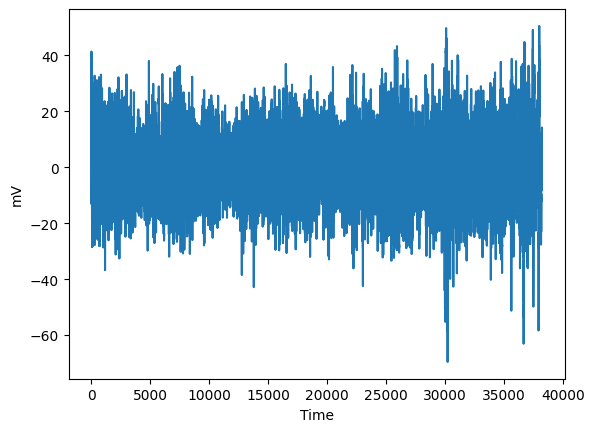

In [66]:
plt.plot(clean_eeg[0])
plt.xlabel('Time')
plt.ylabel('mV')
plt.show()

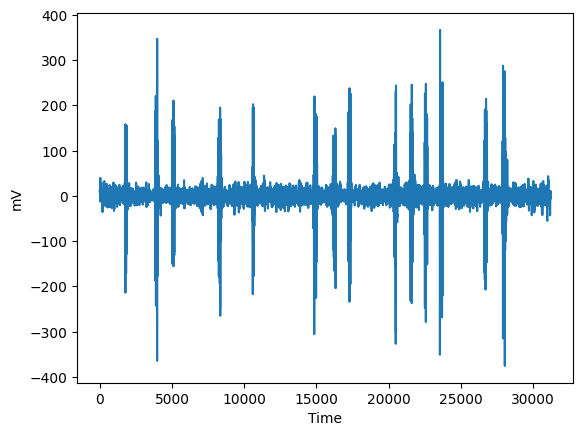

In [67]:
plt.plot(noisy_eeg[0])
plt.xlabel('Time')
plt.ylabel('mV')
plt.show()

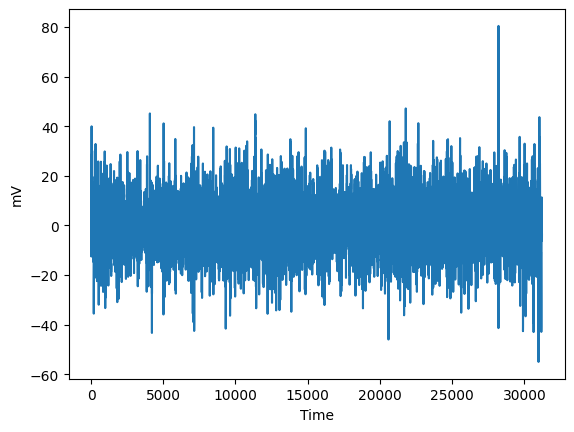

In [68]:
plt.plot(transformed_eeg[0])
plt.xlabel('Time')
plt.ylabel('mV')
plt.show()